In [1]:
import geopandas as gpd
import pandas as pd
from pathlib import Path

data_folder = Path("D:/Nextcloud/HabitAlp2.0/Originaldaten/")
mapping_years = ["A", "B", "C"]

# Create Vector Layer with new Target Classes

## Read Data

In [2]:
habitalp_2013 = gpd.read_file(data_folder / "habitalp_alte_daten/HIK-CD_2.1.1.gpkg")

habitalp_2013.head()

,OBJECTID,PI1_Z,PI2_Z,A_HT,A_DC_WATER,A_DC_ROCK,A_DC_SCREE,A_DC_SOIL,A_DC_HERBS,A_DC_DWARF,...,I_EDITOR,I_EDITED,Q_CREATOR,Q_CREATED,Q_EDITOR,Q_EDITED,KARTIERT,SHAPE_Length,SHAPE_Area,geometry
0,3,0,0,7014,0,0,-1,-1,-1,-1,...,GEIS,2018-02-20 14:03:49+00:00,None,NaT,None,NaT,NPG 2018 1,2519.583919,118248.738625,MULTIPOLYGON Z (((541376.16 271021.41 1260.125...
1,5,0,0,5800,0,19,0,0,11,0,...,FRANZ BAUMANN,2020-07-03 03:16:55+00:00,None,NaT,None,NaT,None,10112.085271,390221.911259,MULTIPOLYGON Z (((542020.824 268908.792 1199.2...
2,6,0,0,7014,0,0,-1,-1,-1,-1,...,GEIS,2018-02-22 13:12:57+00:00,None,NaT,None,NaT,NPG 2018 2,1641.304529,34786.875706,MULTIPOLYGON Z (((544077.271 271171.294 667.54...
3,8,0,0,5440,0,0,20,0,0,0,...,PIUS HAUENSTEIN,2021-04-19 08:17:56+00:00,None,NaT,LINDA CAMATHIAS,2018-04-23 09:35:30+00:00,NPG 2017 5,2878.376341,28685.697339,MULTIPOLYGON Z (((541885.021 270285.619 989.70...
4,16,0,0,5440,0,0,20,0,0,0,...,FRANZ BAUMANN,2020-07-21 09:32:02+00:00,None,NaT,None,NaT,None,2393.300327,39882.560240,MULTIPOLYGON Z (((543859.617 269877.704 664.77...


In [3]:
habitalp_new_target_classes = habitalp_2013[["geometry", "OBJECTID"]].to_crs(epsg=32633)

habitalp_new_target_classes["Area Planimetric"] = habitalp_new_target_classes.area

habitalp_new_target_classes["A_Class"] = "Not Assigned"
habitalp_new_target_classes["A_Class_ID"] = 0
habitalp_new_target_classes["A_Main_Category"] = "Not Assigned"
habitalp_new_target_classes["A_Main_Category_ID"] = 0

habitalp_new_target_classes["B_Class"] = "Not Assigned"
habitalp_new_target_classes["B_Class_ID"] = 0
habitalp_new_target_classes["B_Main_Category"] = "Not Assigned"
habitalp_new_target_classes["B_Main_Category_ID"] = 0

habitalp_new_target_classes["C_Class"] = "Not Assigned"
habitalp_new_target_classes["C_Class_ID"] = 0
habitalp_new_target_classes["C_Main_Category"] = "Not Assigned"
habitalp_new_target_classes["C_Main_Category_ID"] = 0

habitalp_new_target_classes.head()

,geometry,OBJECTID,Area Planimetric,A_Class,A_Class_ID,A_Main_Category,A_Main_Category_ID,B_Class,B_Class_ID,B_Main_Category,B_Main_Category_ID,C_Class,C_Class_ID,C_Main_Category,C_Main_Category_ID
0,MULTIPOLYGON Z (((465931.994 5268780.151 1260....,3,118130.309547,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0
1,MULTIPOLYGON Z (((466530.933 5266655.262 1199....,5,389826.417854,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0
2,MULTIPOLYGON Z (((468634.334 5268872.049 667.5...,6,34751.558069,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0
3,MULTIPOLYGON Z (((466424.719 5268033.992 989.7...,8,28657.060761,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0
4,MULTIPOLYGON Z (((468389.127 5267584.074 664.7...,16,39842.296005,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0


## Target Classes V3

In [4]:
names_en = [
    "Waterbody",
    "Gravel bank, shoal, fluviatile",
    "Erosion area, gully",
    "Debris-covered areas",
    "Rock",
    "Young conif. (growth, thicket)",
    "Young broadl. (growth, thicket)",
    "Conif. pole timber CC<80",
    "Conif. pole timber CC>=80",
    "Broadl. pole timber",
    "Conif. mature forest CC<80",
    "Conif. mature forest CC>=80",
    "Broadl. mature forest CC<80",
    "Broadl. mature forest CC>=80",
    "Old conif. forest, multilayered CC<80",
    "Old conif. forest, multilayered CC>=80",
    "Old broadl. forest, multilayered CC<80",
    "Old broadl. forest, multilayered CC>=80",
    "Clearcut areas",
    "Mountain dwarf forest",
    "Grassland, buffer strip",
    "Alpine grassland, heath",
    "Low importance or small extent",
]

description_en = [
    "Waterbody",
    "Gravel bank, shoal, fluviatile",
    "Erosion area, gully",
    "Debris-covered areas",
    "Rock",
    "Young coniferous (growth, thicket)",
    "Young broad-leaved (growth, thicket)",
    "Coniferous pole timber CC<80",
    "Coniferous pole timber CC>=80",
    "Broad-leaved pole timber",
    "Coniferous mature forest CC<80",
    "Coniferous mature forest CC>=80",
    "Broad-leaved mature forest CC<80",
    "Broad-leaved mature forest CC>=80",
    "Old coniferous forest, multilayered CC<80",
    "Old coniferous forest, multilayered CC>=80",
    "Old broad-leaved forest, multilayered CC<80",
    "Old broad-leaved forest, multilayered CC>=80",
    "Clearcut areas",
    "Mountain dwarf forest ('Krummholz' belt)",
    "Grassland, buffer strip between forest/open land",
    "Alpine grassland, heath",
    "All other classes/areas of low importance and/or small extent",
]

names_de = [
    "Gewässer",
    "Kiesbank, Sandbank, fluviatil",
    "Erosionsfläche, Rinne",
    "Lockermaterial",
    "Fels",
    "Nadel-Jungwuchs, Dickung, Feldgehölz",
    "Laub-Jungwuchs, Dickung, Feldgehölz",
    "Nadel-Stangenholz DG<80",
    "Nadel-Stangenholz DG>=80",
    "Laub-Stangenholz",
    "Nadel-Baumholz DG<80",
    "Nadel-Baumholz DG>=80",
    "Laub-Baumholz DG<80",
    "Laub-Baumholz DG>=80",
    "Nadel-Altbestand, mehrsch. DG<80",
    "Nadel-Altbestand, mehrsch. DG>=80",
    "Laub-Altbestand, mehrsch. DG<80",
    "Laub-Altbestand, mehrsch. DG>=80",
    "Schlagflächen",
    "Krummholzgürtel",
    "Grünland, Saumvegetation",
    "Berggrünland, Heide",
    "Priorität 1",
]

description_de = [
    "Gewässer",
    "Kiesbank, Sandbank, fluviatil",
    "Erosionsfläche, Rinne, Runse",
    "Schutt/Geröll/Blöcke/Schuttflur",
    "Fels",
    "Jungwuchs, Dickung, Feldgehölz Nadeldominiert",
    "Jungwuchs, Dickung, Feldgehölz Laubdominiert",
    "Stangenholz, Wachstumsstadium Nadeldominiert DG<80",
    "Stangenholz, Wachstumsstadium Nadeldominiert DG>=80",
    "Stangenholz, Wachstumsstadium Laubdominiert",
    "Baumholz Nadeldominiert DG<80",
    "Baumholz Nadeldominiert DG>=80",
    "Baumholz Laubdominiert DG<80",
    "Baumholz Laubdominiert DG>=80",
    "Altbestand, Altersstadium/Reifestadium, Kronendach mehrschichtig Nadeldominiert DG<80",
    "Altbestand, Altersstadium/Reifestadium, Kronendach mehrschichtig Nadeldominiert DG>=80",
    "Altbestand, Altersstadium/Reifestadium, Kronendach mehrschichtig Laubdominiert DG<80",
    "Altbestand, Altersstadium/Reifestadium, Kronendach mehrschichtig Laubdominiert DG>=80",
    "Schlagflächen",
    "Krummholzgürtel",
    "Grünland, Weidefläche, stark verändert, Lägerflur, Wildgehege, Gebüschwald, Hochstaudenfluren, Ruderal- und Saumvegetation",
    "Montane/subalpine/alpine Rasen, Wiese, Weide, Zwergstrauchheide",
    "Priorität 1 und ungenutzte Klassen",
]

classes_habitalp_2013 = [
    [2311, 2312, 2313, 2322, 2370, 2533, 2411, 2511, 2512, 2513],
    [5410],
    [5430, 5440],
    [5700, 5701, 5702, 5703],
    [5800],
    [7011, 7012],
    [7011, 7012],
    [7013],
    [7013],
    [7013],
    [7014],
    [7014],
    [7014],
    [7014],
    [7015, 7021, 7022, 7030],
    [7015, 7021, 7022, 7030],
    [7015, 7021, 7022, 7030],
    [7015, 7021, 7022, 7030],
    [7710],
    [],
    [4210, 4220, 4230, 4260, 4710, 4711, 4712, 4713, 4720, 4721, 4722, 4723, 4731, 4733, 7850, 9314],
    [4240, 5610],
    [2110, 2120, 2130, 2314, 2315, 2321, 2330, 2331, 2332, 2333, 2335, 2336, 2339, 2370, 3100, 3210, 3310, 4300, 4310, 4904, 5110, 5111, 5510, 5520, 5530, 5540, 5920, 6200, 6300, 7750, 8130, 8200, 8322, 8324, 8330, 8331, 8339, 8400, 8410, 8420, 9122, 9130, 9140, 9150, 9160, 9170, 9212, 9213, 9214, 9215, 9217, 9218, 9219, 9221, 9222, 9227, 9228, 9229, 9292, 9311, 9320, 9322, 9330, 9340, 9362, 9391, 9392]
]

priority_classes = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1]

main_category_ids = [2, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 10]

main_category_dict_en = {
    2: "Waterbodies",
    3: "Bogland",
    4: "Agriculture",
    5: "Bare soil",
    6: "Copses",
    7: "Forest",
    8: "Disturbed Sites",
    9: "Settlements",
    10: "Others",
}

main_category_dict_de = {
    2: "Wasserflächen",
    3: "Moore",
    4: "Landwirtschaft",
    5: "Rohboden",
    6: "Gehölze",
    7: "Wald",
    8: "Gestörte Standorte",
    9: "Siedlungen",
    10: "Sonstige",
}

main_categories_en = [main_category_dict_en[i] for i in main_category_ids]
main_categories_de = [main_category_dict_de[i] for i in main_category_ids]

data = {
    "id": range(1, len(names_en) + 1),
    "Name (de)": names_de,
    "Classes in HabitAlp 2013": [", ".join(map(str, classes)) for classes in classes_habitalp_2013],
    "Priority Class": priority_classes,
    "id Main Category": main_category_ids,
    "Main Category (en)": main_categories_en,
    "Main Category (de)": main_categories_de,
    "Description (en)": description_en,
    "Description (de)": description_de,
}
target_classes = pd.DataFrame(data=data, index=names_en)
target_classes.index.name = "Name"

target_classes.head()

,id,Name (de),Classes in HabitAlp 2013,Priority Class,id Main Category,Main Category (en),Main Category (de),Description (en),Description (de)
Name,,,,,,,,,
Waterbody,1,Gewässer,"2311, 2312, 2313, 2322, 2370, 2533, 2411, 2511...",3,2,Waterbodies,Wasserflächen,Waterbody,Gewässer
"Gravel bank, shoal, fluviatile",2,"Kiesbank, Sandbank, fluviatil",5410,3,5,Bare soil,Rohboden,"Gravel bank, shoal, fluviatile","Kiesbank, Sandbank, fluviatil"
"Erosion area, gully",3,"Erosionsfläche, Rinne","5430, 5440",3,5,Bare soil,Rohboden,"Erosion area, gully","Erosionsfläche, Rinne, Runse"
Debris-covered areas,4,Lockermaterial,"5700, 5701, 5702, 5703",3,5,Bare soil,Rohboden,Debris-covered areas,Schutt/Geröll/Blöcke/Schuttflur
Rock,5,Fels,5800,3,5,Bare soil,Rohboden,Rock,Fels


## Direct Assign

In [5]:
classes_to_assign_automatically = (
    target_classes.dropna(subset=["Classes in HabitAlp 2013"]).drop_duplicates(subset=["Classes in HabitAlp 2013"], keep=False)
)
classes_to_assign_automatically = classes_to_assign_automatically.loc[:, ["id", "Classes in HabitAlp 2013", "id Main Category", "Main Category (en)"]]

classes_to_assign_automatically

,id,Classes in HabitAlp 2013,id Main Category,Main Category (en)
Name,,,,
Waterbody,1,"2311, 2312, 2313, 2322, 2370, 2533, 2411, 2511...",2,Waterbodies
"Gravel bank, shoal, fluviatile",2,5410,5,Bare soil
"Erosion area, gully",3,"5430, 5440",5,Bare soil
Debris-covered areas,4,"5700, 5701, 5702, 5703",5,Bare soil
Rock,5,5800,5,Bare soil
Clearcut areas,19,7710,7,Forest
Mountain dwarf forest,20,,7,Forest
"Grassland, buffer strip",21,"4210, 4220, 4230, 4260, 4710, 4711, 4712, 4713...",4,Agriculture
"Alpine grassland, heath",22,"4240, 5610",4,Agriculture


In [6]:
for prefix in mapping_years:
    for class_name, row in classes_to_assign_automatically.iterrows():
        classes_2013 = classes_habitalp_2013[row["id"] - 1]
        class_filter = habitalp_2013[f"{prefix}_HT"].isin(classes_2013)
        habitalp_new_target_classes.loc[class_filter, f"{prefix}_Class"] = class_name
        habitalp_new_target_classes.loc[class_filter, f"{prefix}_Class_ID"] = row["id"]
        habitalp_new_target_classes.loc[class_filter, f"{prefix}_Main_Category"] = row["Main Category (en)"]
        habitalp_new_target_classes.loc[class_filter, f"{prefix}_Main_Category_ID"] = row["id Main Category"]

habitalp_new_target_classes.head()

,geometry,OBJECTID,Area Planimetric,A_Class,A_Class_ID,A_Main_Category,A_Main_Category_ID,B_Class,B_Class_ID,B_Main_Category,B_Main_Category_ID,C_Class,C_Class_ID,C_Main_Category,C_Main_Category_ID
0,MULTIPOLYGON Z (((465931.994 5268780.151 1260....,3,118130.309547,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0
1,MULTIPOLYGON Z (((466530.933 5266655.262 1199....,5,389826.417854,Rock,5,Bare soil,5,Rock,5,Bare soil,5,Rock,5,Bare soil,5
2,MULTIPOLYGON Z (((468634.334 5268872.049 667.5...,6,34751.558069,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0,Not Assigned,0
3,MULTIPOLYGON Z (((466424.719 5268033.992 989.7...,8,28657.060761,"Erosion area, gully",3,Bare soil,5,"Erosion area, gully",3,Bare soil,5,"Erosion area, gully",3,Bare soil,5
4,MULTIPOLYGON Z (((468389.127 5267584.074 664.7...,16,39842.296005,"Erosion area, gully",3,Bare soil,5,"Erosion area, gully",3,Bare soil,5,"Erosion area, gully",3,Bare soil,5


## Assign by Thresholds

Forest type (Conifer, Deciduous) and coverage interval:

In [7]:
forest_class_coverage_intervals = {
    "Young conif. (growth, thicket)": None,
    "Young broadl. (growth, thicket)": None,
    "Conif. pole timber": [pd.Interval(0, 70, closed='both'), pd.Interval(80, 100, closed='both')],
    "Broadl. pole timber": None,
    "Conif. mature forest": [pd.Interval(0, 70, closed='both'), pd.Interval(80, 100, closed='both')],
    "Broadl. mature forest": [pd.Interval(0, 70, closed='both'), pd.Interval(80, 100, closed='both')],
    "Old conif. forest, multilayered": [pd.Interval(0, 70, closed='both'), pd.Interval(80, 100, closed='both')],
    "Old broadl. forest, multilayered": [pd.Interval(0, 70, closed='both'), pd.Interval(80, 100, closed='both')],
}

dc_value_map = {
    0: 0,
    11: 10,
    12: 20,
    13: 30,
    14: 40,
    15: 50,
    16: 60,
    17: 70,
    18: 80,
    19: 90,
    20: 100,
    -2: -2
}

for prefix in mapping_years:
    for forest_class, coverage_intervals in forest_class_coverage_intervals.items():
        if "onif" in forest_class:
            # Conifer dominating
            condition_dominating_species = (
                (habitalp_2013[f"{prefix}_L_000"] >= 0)
                & (habitalp_2013[f"{prefix}_C_000"] >= 0)
                & (habitalp_2013[f"{prefix}_C_000"] >= habitalp_2013[f"{prefix}_L_000"])
            )
        elif "roadl" in forest_class:
            # Deciduous dominating
            condition_dominating_species = (
                (habitalp_2013[f"{prefix}_L_000"] >= 0)
                & (habitalp_2013[f"{prefix}_C_000"] >= 0)
                & (habitalp_2013[f"{prefix}_C_000"] < habitalp_2013[f"{prefix}_L_000"])
            )
        if coverage_intervals:
            for coverage, coverage_prefix in zip(coverage_intervals, ["CC<80", "CC>=80"]):
                class_name = f"{forest_class} {coverage_prefix}"
                class_id = target_classes.loc[class_name, "id"]
                classes_2013 = classes_habitalp_2013[class_id - 1]

                condition_classes = habitalp_2013[f"{prefix}_HT"].isin(classes_2013)
                condition_coverage = habitalp_2013[f"{prefix}_DC_TREES"].apply(
                    lambda x: dc_value_map[x] in coverage
                )

                habitalp_new_target_classes.loc[
                    condition_classes
                    & condition_dominating_species
                    & condition_coverage,
                    [
                        f"{prefix}_Class",
                        f"{prefix}_Class_ID",
                        f"{prefix}_Main_Category",
                        f"{prefix}_Main_Category_ID",
                    ],
                ] = [class_name, class_id] + target_classes.loc[
                    class_name, ["Main Category (en)", "id Main Category"]
                ].to_list()
        else:
            class_id = target_classes.loc[forest_class, "id"]
            classes_2013 = classes_habitalp_2013[class_id - 1]
            condition_classes = habitalp_2013[f"{prefix}_HT"].isin(classes_2013)
            habitalp_new_target_classes.loc[
                condition_classes & condition_dominating_species,
                [
                    f"{prefix}_Class",
                    f"{prefix}_Class_ID",
                    f"{prefix}_Main_Category",
                    f"{prefix}_Main_Category_ID",
                ],
            ] = [forest_class, class_id] + target_classes.loc[
                forest_class, ["Main Category (en)", "id Main Category"]
            ].to_list()

Krummholzgürtel:

In [8]:
for prefix in mapping_years:
    habitalp_new_target_classes.loc[
        (habitalp_2013[f"{prefix}_L_630"] >= 5)
        | (habitalp_2013[f"{prefix}_L_630"] + habitalp_2013[f"{prefix}_C_341"] >= 7),
        [
            f"{prefix}_Class",
            f"{prefix}_Class_ID",
            f"{prefix}_Main_Category",
            f"{prefix}_Main_Category_ID",
        ],
    ] = ["Mountain dwarf forest"] + target_classes.loc[
        "Mountain dwarf forest", ["id", "Main Category (en)", "id Main Category"]
    ].to_list()

## Zonal Statistics

In [9]:
statistics = habitalp_new_target_classes.groupby(by=["C_Class"])["Area Planimetric"].agg(["sum", "count", "mean"])
total_area = statistics["sum"].sum()
statistics["share"] = statistics["sum"] / total_area * 100
statistics.loc[:, ["sum", "mean"]] /= 10000
statistics = statistics.round({"sum": 1, "mean": 1, "share": 2})

statistics.head()

,sum,count,mean,share
C_Class,,,,
"Alpine grassland, heath",1095.7,2882,0.4,7.12
Broadl. mature forest CC<80,244.0,325,0.8,1.58
Broadl. mature forest CC>=80,392.4,619,0.6,2.55
Broadl. pole timber,161.3,671,0.2,1.05
Clearcut areas,365.7,1175,0.3,2.38


In [10]:
target_classes.loc[statistics.index, ["Area (ha)"]] = statistics["sum"]
target_classes.loc[statistics.index, ["Polygons"]] = statistics["count"]
target_classes.loc[statistics.index, ["Share (%)"]] = statistics["share"]

target_classes

,id,Name (de),Classes in HabitAlp 2013,Priority Class,id Main Category,Main Category (en),Main Category (de),Description (en),Description (de),Area (ha),Polygons,Share (%)
Name,,,,,,,,,,,,
Waterbody,1,Gewässer,"2311, 2312, 2313, 2322, 2370, 2533, 2411, 2511...",3,2,Waterbodies,Wasserflächen,Waterbody,Gewässer,95.3,566.0,0.62
"Gravel bank, shoal, fluviatile",2,"Kiesbank, Sandbank, fluviatil",5410,3,5,Bare soil,Rohboden,"Gravel bank, shoal, fluviatile","Kiesbank, Sandbank, fluviatil",17.2,303.0,0.11
"Erosion area, gully",3,"Erosionsfläche, Rinne","5430, 5440",3,5,Bare soil,Rohboden,"Erosion area, gully","Erosionsfläche, Rinne, Runse",447.3,2172.0,2.90
Debris-covered areas,4,Lockermaterial,"5700, 5701, 5702, 5703",3,5,Bare soil,Rohboden,Debris-covered areas,Schutt/Geröll/Blöcke/Schuttflur,594.7,2708.0,3.86
Rock,5,Fels,5800,3,5,Bare soil,Rohboden,Rock,Fels,2632.8,2667.0,17.10
"Young conif. (growth, thicket)",6,"Nadel-Jungwuchs, Dickung, Feldgehölz","7011, 7012",3,7,Forest,Wald,"Young coniferous (growth, thicket)","Jungwuchs, Dickung, Feldgehölz Nadeldominiert",439.8,1001.0,2.86
"Young broadl. (growth, thicket)",7,"Laub-Jungwuchs, Dickung, Feldgehölz","7011, 7012",3,7,Forest,Wald,"Young broad-leaved (growth, thicket)","Jungwuchs, Dickung, Feldgehölz Laubdominiert",206.1,744.0,1.34
Conif. pole timber CC<80,8,Nadel-Stangenholz DG<80,7013,3,7,Forest,Wald,Coniferous pole timber CC<80,"Stangenholz, Wachstumsstadium Nadeldominiert D...",340.4,880.0,2.21
Conif. pole timber CC>=80,9,Nadel-Stangenholz DG>=80,7013,3,7,Forest,Wald,Coniferous pole timber CC>=80,"Stangenholz, Wachstumsstadium Nadeldominiert D...",686.1,1083.0,4.46


In [11]:
len(target_classes)

23

## Plot

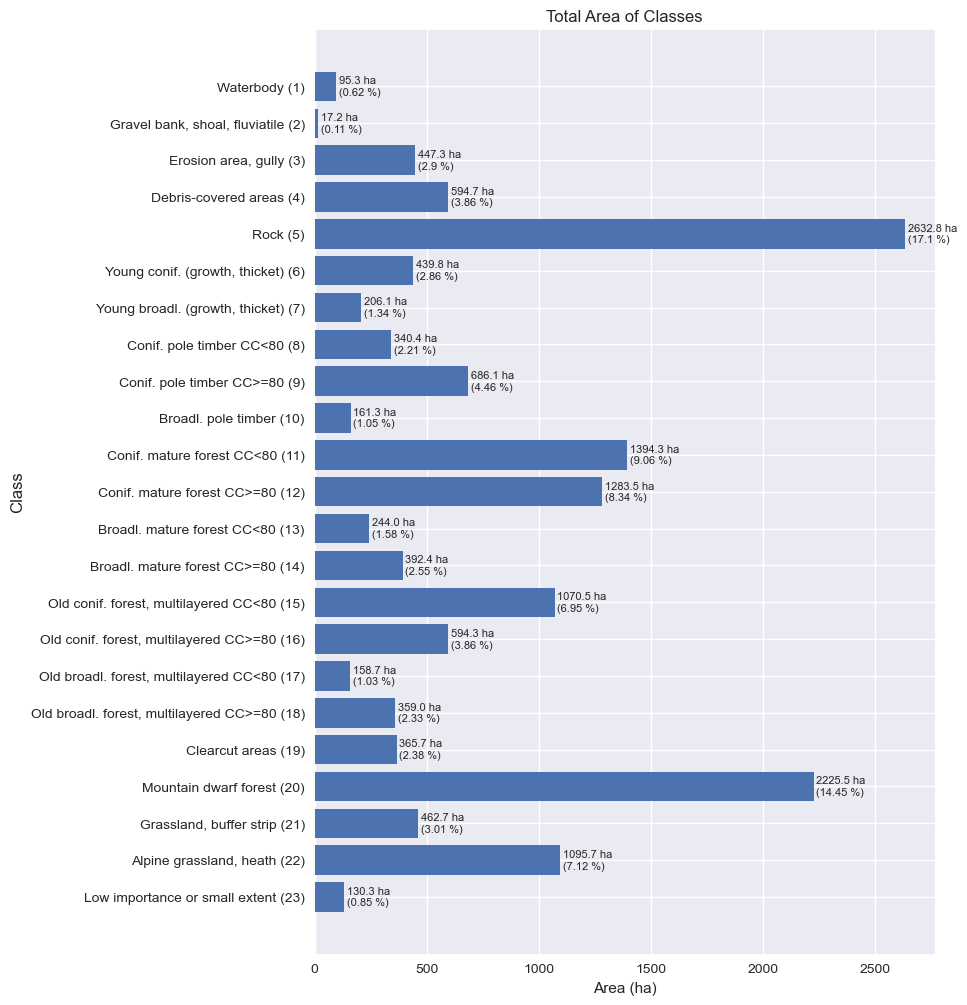

In [12]:
import numpy as np
import matplotlib.pyplot as plt

num_classes = len(target_classes)

plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize=(8, 12))

left = np.zeros(num_classes)

labels = list(target_classes.index)
labels = [f"{labels[it]} ({it+1})" for it in range(len(labels))]

bars = ax.barh(labels, target_classes["Area (ha)"], left=left)

bar_labels = [f"{area} ha\n({share} %)" for area, share in zip(target_classes["Area (ha)"], target_classes["Share (%)"])]
ax.bar_label(bars, labels=bar_labels, label_type="edge", padding=2, fontsize=8)
ax.set_xlabel("Area (ha)")
ax.set_ylabel("Class", fontsize=12)
ax.set_title("Total Area of Classes")
ax.yaxis.set_inverted(True)

plt.show()

## Save Result

In [13]:
habitalp_new_target_classes.to_file(data_folder / "habitalp_target_classes/habitalp_classes_v3.gpkg")

In [14]:
target_classes.to_csv(data_folder / "habitalp_target_classes/classes_v3_description.csv")

# Create Mask Raster Layer

Reference:
- https://pygis.io/docs/e_raster_rasterize.html
- https://gis.stackexchange.com/questions/151339/rasterize-a-shapefile-with-geopandas-or-fiona-python

In [15]:
import numpy as np
import rasterio as rio
from rasterio import features

year = 2013
nodata_value = 255
layer_name = f"classes_forest_v1_{year}"

In [16]:
habitalp_classes = gpd.read_file(
    data_folder / "habitalp_target_classes/habitalp_2013_new_target_classes_v3.gpkg",
    #"D:/Nextcloud/HabitAlp2.0/trainingsdaten_2020/habitalp_2020.gpkg"
)

habitalp_classes.head()

,OBJECTID,PI1_Z,PI2_Z,A_HT,A_DC_WATER,A_DC_ROCK,A_DC_SCREE,A_DC_SOIL,A_DC_HERBS,A_DC_DWARF,...,A_Main_Category_ID_2024,B_Target_Class_2024,B_Target_Class_ID_2024,B_Main_Category_2024,B_Main_Category_ID_2024,C_Target_Class_2024,C_Target_Class_ID_2024,C_Main_Category_2024,C_Main_Category_ID_2024,geometry
0,3,0,0,7014,0,0,-1,-1,-1,-1,...,7,Nadel-Baumholz DG80-100,12,Wald,7,Nadel-Baumholz DG0-70,11,Wald,7,MULTIPOLYGON Z (((465931.994 5268780.151 1260....
1,5,0,0,5800,0,19,0,0,11,0,...,5,Fels,5,Rohboden,5,Fels,5,Rohboden,5,MULTIPOLYGON Z (((466530.933 5266655.262 1199....
2,6,0,0,7014,0,0,-1,-1,-1,-1,...,7,Nadel-Baumholz DG0-70,11,Wald,7,Nadel-Baumholz DG0-70,11,Wald,7,MULTIPOLYGON Z (((468634.334 5268872.049 667.5...
3,8,0,0,5440,0,0,20,0,0,0,...,5,"Erosionsfläche, Rinne",3,Rohboden,5,"Erosionsfläche, Rinne",3,Rohboden,5,MULTIPOLYGON Z (((466424.719 5268033.992 989.7...
4,16,0,0,5440,0,0,20,0,0,0,...,5,"Erosionsfläche, Rinne",3,Rohboden,5,"Erosionsfläche, Rinne",3,Rohboden,5,MULTIPOLYGON Z (((468389.127 5267584.074 664.7...


In [17]:
# Use existing raster file as reference for pixel-matching output
reference_file = rio.open(
    data_folder / "processed/orthophoto_gis_stmk/flug_2013_2015_rgb.tif"
    #data_folder / "model_output/best-parameters-4.3/prediction_cross-temporal.tif"
)

out_transform = reference_file.transform
out_width = reference_file.width
out_height = reference_file.height

In [ ]:
match year:
    case 2003:
        mapped_values = habitalp_classes["B_Target_Class_ID_2024"]
    case 2013:
        mapped_values = habitalp_classes["C_Target_Class_ID_2024"]
    case 2020:
        mapped_values = habitalp_classes["D_Target_Class_ID_2020"]

# this is where we create a generator of geom, value pairs to use in rasterizing
#new_classes = [14, 14, 14, 14, 14, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 13, 14, 14, 14] # Forest classes
#new_classes = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0] # Binary Forest Mask
forest_classes = [7011, 7012, 7013, 7014, 7015, 7021, 7022, 7030, 7099, 7710, 7750, 7810, 7850]
shapes = (
    (geom, value)
    #(geom, new_classes[value-1])
    for geom, value in zip(habitalp_classes.geometry, mapped_values)
)

rasterized = features.rasterize(
    shapes=shapes,
    out_shape=(out_height, out_width),
    transform=out_transform,
    fill=nodata_value,
    nodata=nodata_value,
    dtype=rio.uint8,
    default_value=99,
)

## Crop to Valid Data Extent and Save

In [ ]:
mask_arr = rasterized != nodata_value
rows = np.any(mask_arr, axis=1)
cols = np.any(mask_arr, axis=0)
# Find the min and max row and column indices where the mask is True
row_min, row_max = np.where(rows)[0][[0, -1]]
col_min, col_max = np.where(cols)[0][[0, -1]]
# Crop array
cropped = rasterized[row_min:row_max+1, col_min:col_max+1]
# Calculate new transform
new_transform = rio.windows.transform(rio.windows.Window(col_min, row_min, cropped.shape[1], cropped.shape[0]), out_transform)

# Save cropped raster
with rio.open(
    data_folder / f"processed/mask/{layer_name}.tif",
    "w",
    driver="GTiff",
    transform=new_transform,
    crs=habitalp_classes.crs,
    count=1,
    width=cropped.shape[1],
    height=cropped.shape[0],
    dtype=rio.uint8,
    nodata=255,
    compress="lzw",
    tiled=True,
    predictor=2,
    bigtiff=True,
) as dst:
    dst.write(cropped, indexes=1)

: 

# Create Value Map from Original Data

Export "A_HT", "B_HT" and "C_HT" column first from QGIS with value map activated and run this code:

In [3]:
values_2013 = pd.read_csv(data_folder / "habitalp_target_classes/habitalp_classes_value_map.csv")

values_2013 = values_2013.stack().reset_index()[0].astype("category")

In [4]:
id = values_2013.cat.categories.str.slice(0, 4).astype(int)
name = values_2013.cat.categories.str.slice(6)

In [5]:
pd.DataFrame(data={"id": id, "Name": name}).to_csv(data_folder / "habitalp_target_classes/habitalp_classes_value_map.csv", index=False)